<a href="https://colab.research.google.com/github/fsrt16/-QSAR-fish-bioconcentration-factor/blob/master/DA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Details



1.   This dataset contains manually-curated experimental bioconcentration factor (BCF) for 1058 molecules (continuous values). Each row contains a molecule, identified by a CAS number, a name (if available), and a SMILES string. Additionally, the KOW (experimental or predicted) is reported. In this database, you will also find Extended Connectivity Fingerprints (binary vectors of 1024 bits), to be used as independent variables to predict the BCF. You can find additional information in the referenced papers.
In case you had questions, please do not hesitate to contact us!

2. CAS number (molecule identifier)
* Molecule Name (if not available, marked as 'n.a.')
* SMILES string to identify the 2D molecular structure
* LogKOW: octanol water partitioning coefficient (experimental or predicted, as indicated by the column 'KOW Type'
* KOW Type: indicates whether the logKOW value is experimental or predicted
* Experimental logBCF (quantitative response): experimental fish bioconcentration factor (logarithm form)



In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Part 1


## 1. Create a dataset with the content of the file

In [187]:
df = pd.read_csv('QS.csv')
df.head()

,CAS,Name,SMILES,LogKOW,KOW type,logBCF
0,105-67-9,n.a.,Oc1ccc(cc1C)C,2.3,exp,1.18
1,108-39-4,n.a.,Oc1cccc(c1)C,1.96,exp,1.03
2,113136-77-9,n.a.,O=C(O)C2CC2(C(=O)Nc1ccc(cc1Cl)Cl),1.98,pred,-0.40
3,114311-32-9,n.a.,O=C(O)c2cc(cnc2(C1=NC(=O)C(N1)(C)C(C)C))COC,1.02,pred,-1.00
4,1689-84-5,n.a.,N#Cc1cc(c(O)c(c1)Br)Br,2.99,pred,0.84


## 2. Drop columns titled Name, SMILES and KOW type.

In [188]:
df = df.drop(['Name', 'SMILES','KOW type'], axis = 1) 
df.head()

,CAS,LogKOW,logBCF
0,105-67-9,2.3,1.18
1,108-39-4,1.96,1.03
2,113136-77-9,1.98,-0.40
3,114311-32-9,1.02,-1.00
4,1689-84-5,2.99,0.84


## 3.Remove the values in column titled “LogKOW” corresponding to the values starting with V-Mey_NA in the column titled “CAS”.

In [0]:
df.drop(df.loc[df['CAS']=='V-Mey_NA'].index, inplace=True)

## 4. Check for missing values. If available, fill it with zeros, ones and mean of column.

In [190]:
df.isna().sum()

CAS       0
LogKOW    2
logBCF    2
dtype: int64

In [191]:
df.dtypes

CAS        object
LogKOW     object
logBCF    float64
dtype: object

Since LogKOW is a float value we should convert it to float64 before replacing the missing values for smooth functioning

In [192]:
df.loc[df['LogKOW']=='Merged']

,CAS,LogKOW,logBCF
195,"disulphonic acid""",Merged,-2.48
401,"acid""",Merged,2.56


Since no information on merged we are replacing it as an nan 

In [0]:
df['LogKOW'] = df['LogKOW'].replace('Merged',np.NaN, regex=True).astype(float)
df['LogKOW'] = df['LogKOW'].astype('float64')

In [194]:
df.dtypes

CAS        object
LogKOW    float64
logBCF    float64
dtype: object

In [195]:
df_with_1 = df
df_with_1.fillna(1, inplace=True)
df_with_1.isna().sum()

CAS       0
LogKOW    0
logBCF    0
dtype: int64

In [196]:
df_with_0 = df
df_with_0.fillna(0, inplace=True)
df_with_0.isna().sum()

CAS       0
LogKOW    0
logBCF    0
dtype: int64

In [197]:
df_with_mean = df
df_with_mean.fillna(df_with_mean.mean(), inplace=True)
df_with_mean.isna().sum()

CAS       0
LogKOW    0
logBCF    0
dtype: int64

## 5. Remove the column titled “CAS”.

In [0]:
del df_with_mean['CAS']

In [199]:
df_with_mean.head()

,LogKOW,logBCF
0,2.30,1.18
1,1.96,1.03
2,1.98,-0.40
3,1.02,-1.00
4,2.99,0.84


## 6. Perform linearity analysis on the resultant dataset.


*   Scatterplot
*   Correlation heatmap
*   PairPlot( " Not a part just for intuition " )



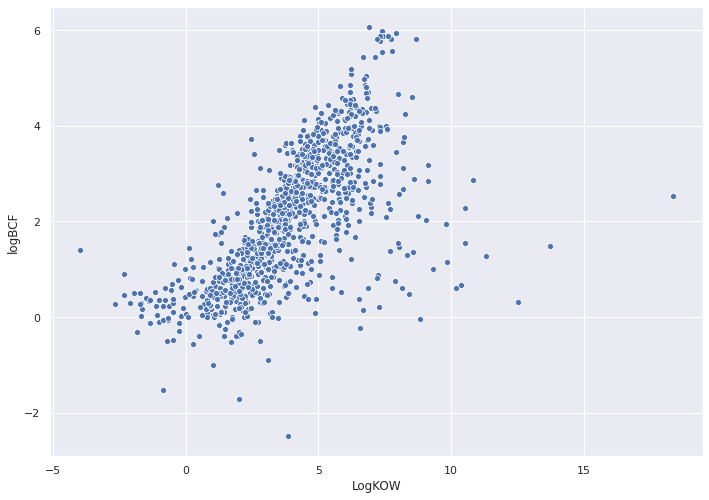

In [157]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid', {'legend.frameon':True})
sns.scatterplot(x="LogKOW", y="logBCF", data=df_with_mean)


In [86]:
df_with_mean.corr()

,LogKOW,logBCF
LogKOW,1.000000,0.664181
logBCF,0.664181,1.000000


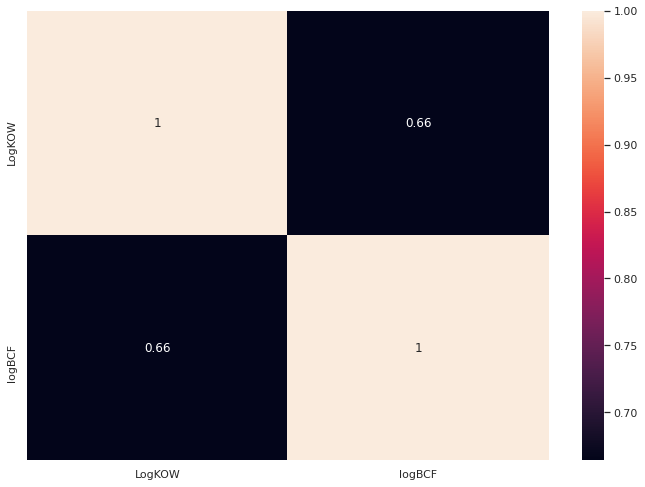

In [88]:
sns.heatmap(df_with_mean.corr(),annot = True)

since correlation lies between +- 0.7 to +- 1 or rather at 0.66 to independent variable thus linearity exits

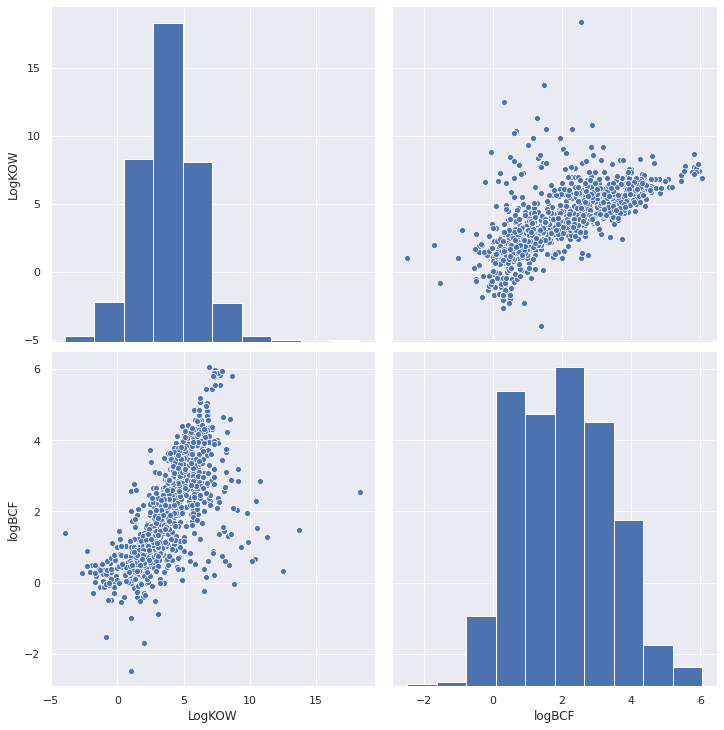

In [210]:
g = sns.pairplot(df_with_mean ,height= 5)

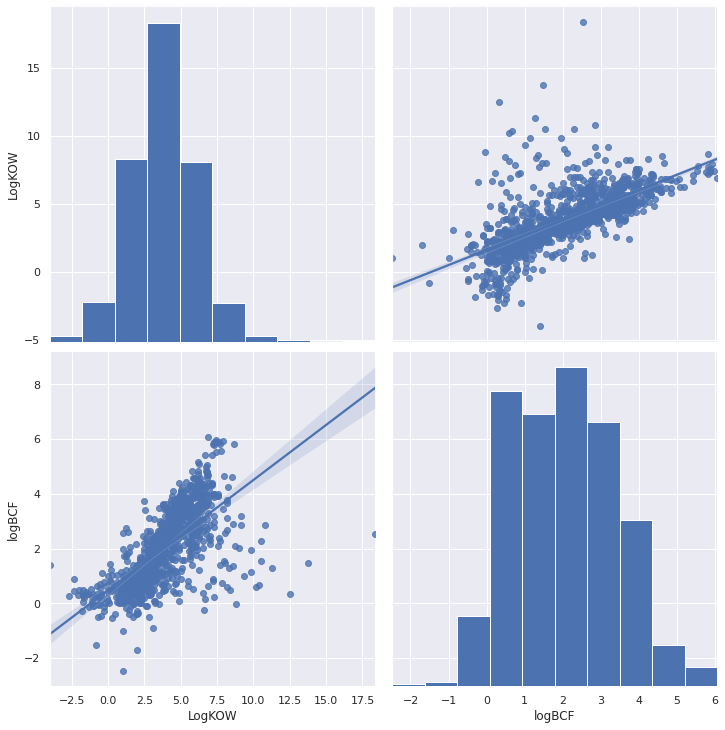

In [211]:
g = sns.pairplot(df_with_mean, kind="reg",height= 5)

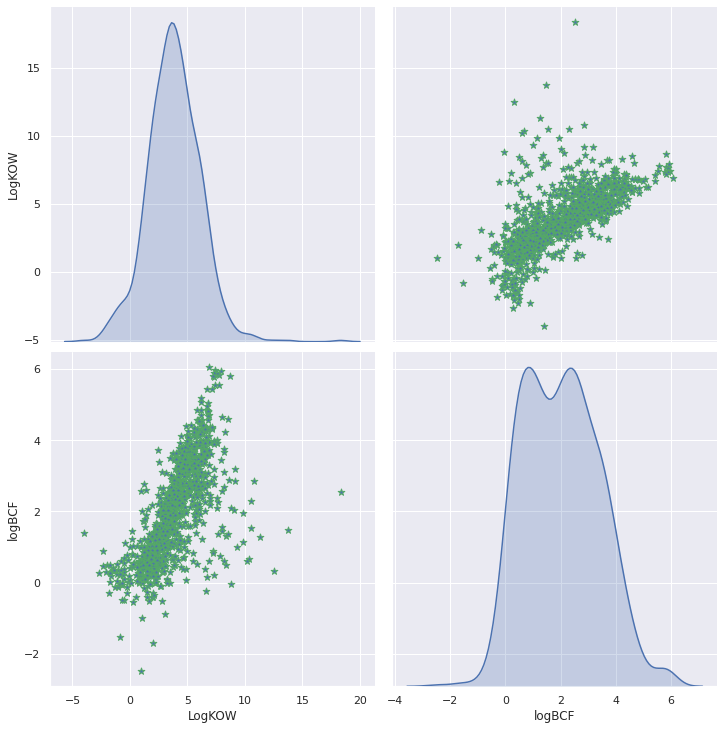

In [212]:
g = sns.pairplot(df_with_mean,diag_kind="kde",markers="*",
                 plot_kws=dict(s=50, edgecolor="g", linewidth=1),
                 diag_kws=dict(shade=True) ,height= 5)

## 7.Normalize the values using min-max normalization.

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_with_mean)
print(scaler.data_max_)
df_norm = scaler.transform(df_with_mean)
df_norm

[18.35  6.06]


array([[0.28187919, 0.42857143],
       [0.26666667, 0.41100703],
       [0.26756152, 0.24355972],
       ...,
       [0.54630872, 0.73067916],
       [0.58791946, 0.66393443],
       [0.58791946, 0.62412178]])

## 8. Construct a regression equation, y=mx+c with LogKOW as independent attribute(x) and logBCF as dependent attribute(y)

In [110]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(df_norm[:,0].reshape(-1,1),df_norm[:,1].reshape(-1,1))
print('Coefficient(m) : ',reg.coef_)
print('Intercept(c) : ',reg.intercept_)

Coefficient(m) :  [[1.0513798]]
Intercept(c) :  [0.15853819]


## 9. Excel Analytics and Veryfication

1. Intercept(c)

![Intercept(c)](https://drive.google.com/uc?id=1M1JHiORiK9E3eUa2zp0543sdjhRHTpwQ)

2. Slope(m)

![alt text](https://drive.google.com/uc?id=1hHTptMfIluJwCTdzTlcBA8KPXnYPYxLW)

3. Summary

![alt text](https://drive.google.com/uc?id=1PzvTlPPZCW6eQDdQXJNu1E2Se-PfapLj)

4. LogBCF

![alt text](https://drive.google.com/uc?id=1TlaWYp5rvK-MNyDj16ZaDL3rCC_DDM5Q)

5. Scatter Plot

![alt text](https://drive.google.com/uc?id=1-1MMoZVqeJhX3_tWKLe3S5sfRL73upAf)

6. Final Plot

![alt text](https://drive.google.com/uc?id=1xdV4KKVIP8c0qcAXGTQsae2ra7j1KoMW)

## 10. Identify MAE,MSE and R2 scores. What are you inferring from the scores?

1. MAE : 0.082796832
The MAE measures the average magnitude of the errors in a set of forecasts, without considering their direction. Thus MAE close to zero signifies that our model have magnitudnal i.e linear changes close to zero. This can also be understood as **our model in centre localized and not outlier localised** as outliers tend to be in the top or at bottom extreme which cancel out each other more often than not. However in the central portion there is negligible difference between predicted and actual value.

2. MSE : 0.0189658423 
MSE is a quadratic scoring rule which measures the average magnitude of the error. i.e it measure the error irrespective of direction as in prior case. The MSE should also be close to 0 as here we have 0.018, this indicates two important facts along with a hypothesis. Since the MSE is low thus we can also conclude based on our previous result on central localization that, we have low outliers which arent tackled by the error. Along with we have small here and there though negligible errors contituting to our MSE. **Again we shall say that our results converges to centre latency of localization, its locus resides around the core or real values and overcomes outliers.**

3. R2 : 0.4569745236
It is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).” Another definition is “(total variance explained by model) / total variance.” So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all. A low value would show a low level of correlation, meaning a regression model that is not valid, but not in all cases. Although our R2 resembles to be on the lower side by looking through a 50 mark glass, we must elaborate and enunciate that **there is no correct r2 score** at which we can say our r2 score is good just like MSE and MAE, its a relative concept. We would further build upon while exploring different k folds and getting different r2's there we can comparitively say which model is better or not. 

### Inference


*   Our model in centre localized and not outlier localised
*   Again we shall say that our results converges to centre latency of localization, its locus resides around the core or real values and overcomes outliers.
*   R2 score is less in a view however since its a comparitive quantity t will be further be explained in k fold cross validation



# Part 2

### 11. Repeat steps from 1 to 7.
### 12. Divide the dataset into having 750 and 308 rows. Randomization may be applied.
### 13. Store the data for 750 rows in train_x and train_y lists.
### 14. Store the data for 308 rows in test_x and actual_y.

1. total columns 1058
   train = 750/1058 = 70.88%
   test = 308/1058 = 29.11%
2. Randomization by seed value in random state
3. X or dependent variable : df_norm[:,0] or LogKOW 
4. Y or independent variable : df_norm[:,1] or LogBCF

In [0]:
from sklearn.model_selection import train_test_split
train_x , test_x , train_y, test_y = train_test_split(df_norm[:,0].reshape(-1,1), df_norm[:,1].reshape(-1,1), test_size=0.2911, random_state=42)

### 15 Predict the value of y, dependent value using the calculated m and c values and store in predicted_y

In [174]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_x,train_y)
print('Coefficient(m) : ',reg.coef_)
print('Intercept(c) : ',reg.intercept_)

Coefficient(m) :  [[1.05140621]]
Intercept(c) :  [0.15766064]


In [0]:
y_pred = reg.predict(test_x)

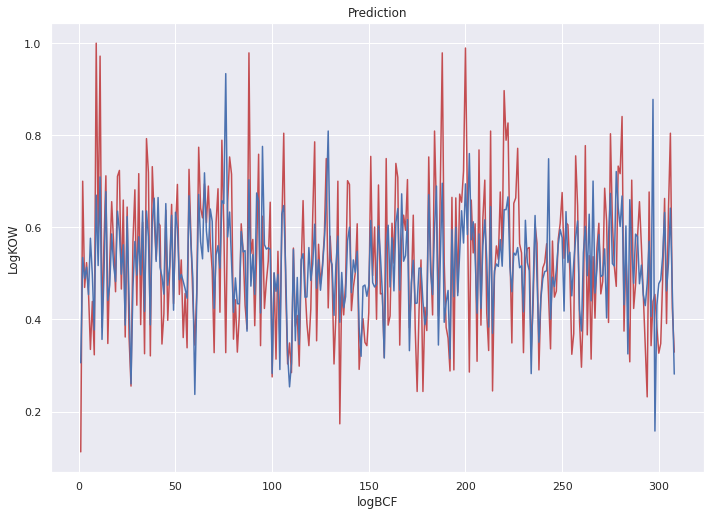

In [176]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(test_y)+1,1)]
plt.plot(c,test_y,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('logBCF')
plt.ylabel('LogKOW')
plt.title('Prediction')
plt.show()

### Inference
1. The above graph not only very well show that our model has overall understood the pattern showcased in the data , but also been able to not learn the outlier values which are being excluded at peeks and troughs by red only.

2. The blue line is localised majorly on the centre region residing through the overall pattern hence forth preventing underfitting i.e bad metric scores and overfitting i.e localizing the outliers of the given data i.e peeks and troughs

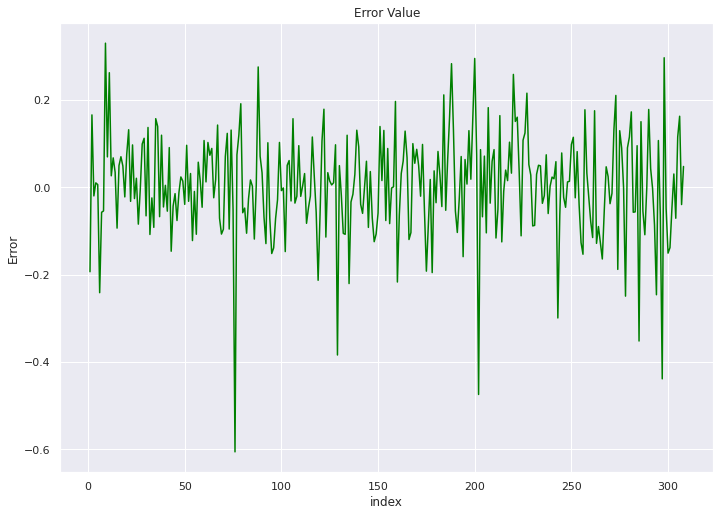

In [177]:
c = [i for i in range(1,len(test_y)+1,1)]
plt.plot(c,test_y-y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

Similar to the above the eroor seems to be localised at centre i.e slight variation from actual and high at peek and troughs showcasing the model hasnt localised to the outlier sections

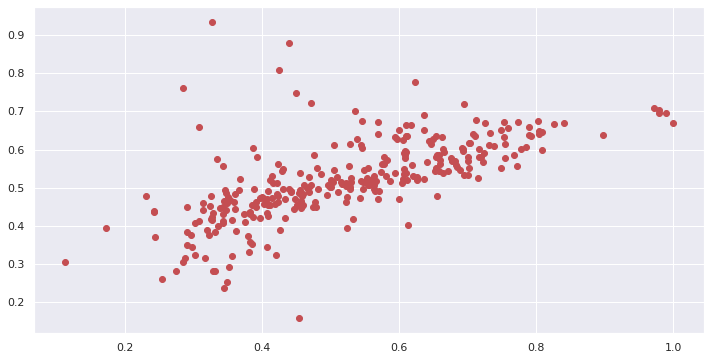

In [178]:
# Just plot actual and predicted values for more insights
plt.figure(figsize=(12,6))
plt.scatter(test_y,y_pred,color='r',linestyle='-')
plt.show()

### 16. Compare the difference between actual_y and predicted_y.
### 17. Calculate MAE, MSE and r2. What do you infer from the scores?

In [179]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MAE :  ' ,mean_absolute_error(test_y,y_pred))
print('MSE :  ' ,mean_squared_error(test_y,y_pred))
print('r2  :  ' ,r2_score(test_y,y_pred))

MAE :   0.08994589176991744
MSE :   0.014374811950015793
r2  :   0.43906551980481134


# Part 3

### 18. Perform cross – validation with 2, 3, 4 and till 14 folds with r2 as the metric


K-Fold CV is where a given data set is split into a K number of sections/folds where each fold is used as a testing set at some point. Lets take the scenario of 5-Fold cross validation(K=5). Here, the data set is split into 5 folds. In the first iteration, the first fold is used to test the model and the rest are used to train the model. In the second iteration, 2nd fold is used as the testing set while the rest serve as the training set. This process is repeated until each fold of the 5 folds have been used as the testing set.



![alt text](https://www.analyticsvidhya.com/wp-content/uploads/2015/11/22.png)


ref : https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

In [180]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score
scores2 = cross_val_score(reg, train_x,train_y, cv=2, scoring='r2')
print(scores2 , scores2.mean())
scores3 = cross_val_score(reg, train_x,train_y, cv=3, scoring='r2')
print(scores3 , scores3.mean())
scores4 = cross_val_score(reg, train_x,train_y, cv=4, scoring='r2')
print(scores4 , scores4.mean())
scores14 = cross_val_score(reg, train_x,train_y, cv=14, scoring='r2')
print(scores14 , scores14.mean())

[0.43140969 0.43939403] 0.43540186309358636
[0.39976764 0.4664225  0.45296952] 0.4397198849203073
[0.36610196 0.48991216 0.47913355 0.39372544] 0.43221827966992055
[0.43016655 0.41252253 0.30630677 0.44068181 0.41276248 0.41515466
 0.57366302 0.56516514 0.34309389 0.53420917 0.46578905 0.18443823
 0.55033796 0.41377486] 0.43200472287421327


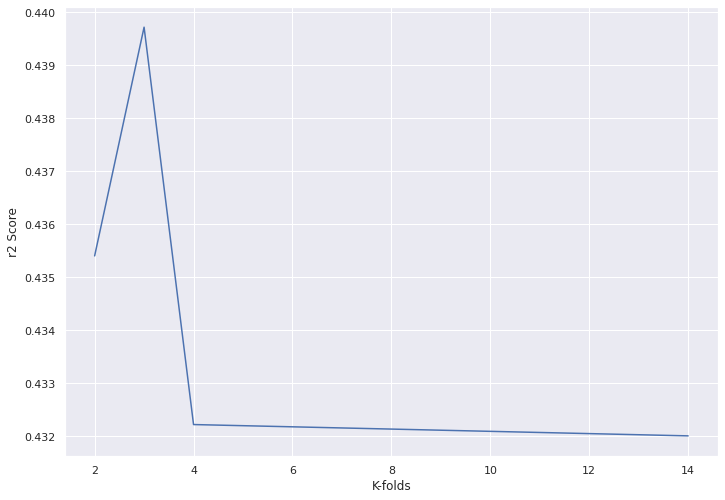

In [181]:
data = {
    'K-folds':[2,3,4,14],
    'r2 Score':[scores2.mean(),scores3.mean(),scores4.mean(),scores14.mean()]
}
data = pd.DataFrame(data=data)
sns.lineplot(x="K-folds", y="r2 Score",data=data, markers='o');

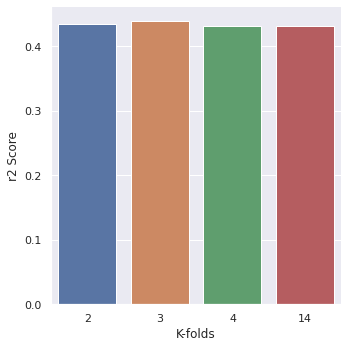

In [182]:
sns.catplot(x="K-folds", y="r2 Score",kind = 'bar',data=data);

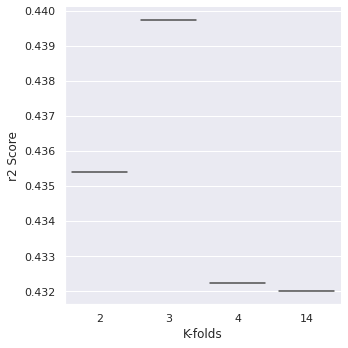

In [183]:
sns.catplot(x="K-folds", y="r2 Score",kind = 'boxen',data=data);

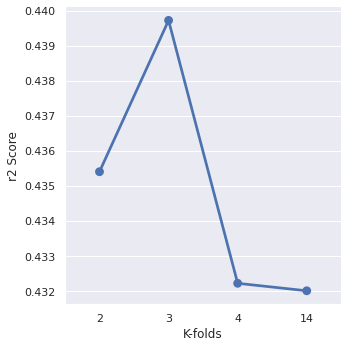

In [184]:
sns.catplot(x="K-folds", y="r2 Score",kind = 'point',data=data);

### 19. Perform thorough analysis on this.
Important points from above values for different k
1. The peak value is achieved at 3.
2. Bar Plots donot give sufficient information however linplot or line charts showcase the difference of values much variantly.
3. This can also be viewed as an ideal result as at cv = 3:
*   Train : 705
*   Test : 353
This can be said that , the division is ideal ie 70-30 , this not only gives enough chances for the training of data but also testing over a good sample roughly 1/3rd of the total gaurantees ideal results.
4. In the view of cv = 2 where training data is very less as compared to ideal ration and cv = 14 where testing data is too small for sriving into any conclusion, cv = 3 logically , experimentally and theoratically fits the cause of cross validation.


cv = cross validation

